## CE9010: Introduction to Data Science
## Semester 2 2017/18
## Xavier Bresson
## ⚠ Student name: 
<br>


## Laboratory test 3 : k-means clustering
Instruction: Check the box with the right answer.<br>

Grading: You will receive 1 point for each of the questions you answer correctly.<br>
$ $


In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# computational time
import time

# remove warning
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 


# Introduction
<hr>
We consider the k-means clustering task with $n$ data points $x_i, i=0,...,n-1$. Each data $x_i$ has d=2 features represented by $x_i=(x_{i(1)},x_{i(2)}) \in \mathbb{R}^2$.<br>

In [4]:
# load data points 
data = np.loadtxt('data/lab03_data01.txt', delimiter=',')

print('The number of data points is ',data.shape[0])
print('The number of data features is ',data.shape[1])
print(data.shape)

The number of data points is  300
The number of data features is  2
(300, 2)


### Q1: What are the mean value and the variance of the two data features $x_{(1)},x_{(2)}$?
<hr>

☐ mean=[3.6,-2.2], var=[3.1,1.8] <br>
☐ mean=[2.3,2.1], var=[1.6,3.8] <br>
☐ mean=[3.6,2.9], var=[3.6,2.8] <br>
☐ mean=[1.1,2.7], var=[2.5,1.9] <br>

Hint: You may use functions `np.mean` and `np.var`.

In [8]:
#YOUR CODE HERE
x1 = data[:,0]
x2 = data[:,1]
print(x1.shape, x2.shape)
mean1 = np.mean(x1)
variance1 = np.var(x1)
mean2 = np.mean(x2)
variance2 = np.var(x2)
print(mean1, mean2, variance1, variance2)

(300,) (300,)
3.6843754000000004 2.9871008 3.6954933043828397 2.830022682408693


### Q2: Apply the z-scoring normalization to the data. What are the new mean value and the new variance of the two data feature $x_{(1)},x_{(2)}$?
<hr>

☐ mean=[1.0,0.0], var=[0.0,1.0] <br>
☐ mean=[1.0,1.0], var=[1.0,1.0] <br>
☐ mean=[1.0,1.0], var=[0.0,0.0] <br>
☐ mean=[0.0,0.0], var=[1.0,1.0] <br>

Hint: The definition of z-scoring normalization is given in "Lecture 5: Gradient Descent Tricks", slide 12.

In [ ]:
#YOUR CODE HERE


### Q3: Visualize the data points. How many clearly separated clusters $K$ can we count?
<hr>

☐ $K$=2 <br>
☐ $K$=3 <br>
☐ $K$=4 <br>
☐ $K$=5 <br>

Hint: You may use function `plt.scatter`.

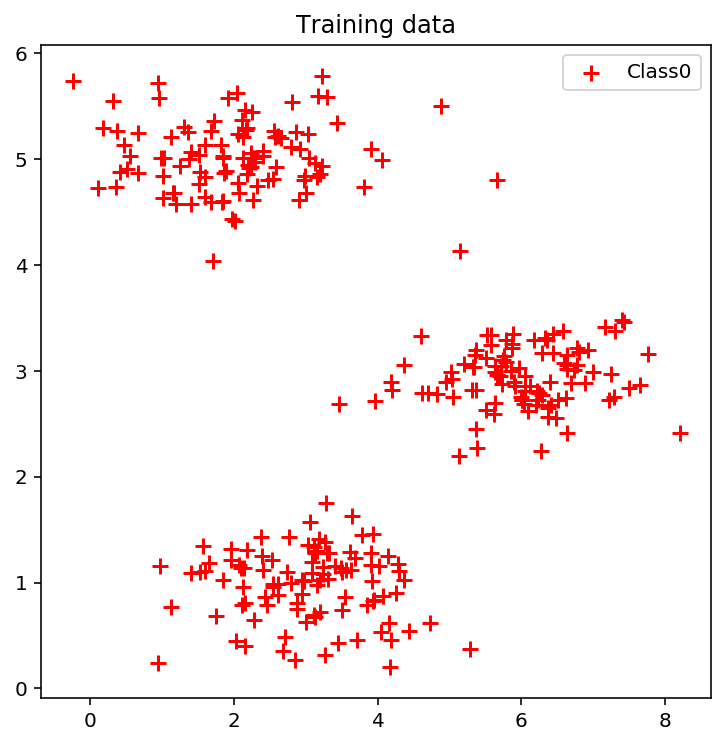

In [12]:
#YOUR CODE HERE
plt.figure(1,figsize=(6,6))
plt.scatter(x1, x2, s=60, c='r', marker='+', label='Class0') 
plt.title('Training data')
plt.legend()
plt.show()

<hr>

Let us implement the k-means algorithm described in "Lecture 8: Unsupervised Learning".

We start with the cluster assignment part. 

We define the cluster assignment vector $a$ of size $n$x1 with the $i^{th}$ element $a_i$ given by:

$$
a_i = \arg \min_k \| x_i - \mu_k \|_2^2,
$$

where $\| x \|_2^2 = \sum_{j=1}^d x_{(j)}^2, x \in \mathbb{R}^2$ is the standard square Euclidean distance, and $\arg \min_k  \| x_i - \mu_k \|_2^2$ returns the index $k$ of the minimum value of $\| x_i - \mu_k \|_2^2$ for values $k=0,1,...,K-1$.

For example, if we have

$$
a = \left[ 
\begin{array}{cccc}
1 \\ 
0 \\ 
1  \\ 
\vdots  \\ 
2
\end{array} 
\right]
$$

Then, the first element of $a$ is $a_0=1$, meaning that the first data $x_0$ belongs to cluster indexed by $1$. The second element of $a$ is $a_1=0$, meaning that the second data $x_1$ belongs to cluster indexed by $0$. The last element of $a$ is $a_{n-1}=2$, meaning that the last data $x_{n-1}$ belongs to cluster indexed by $2$.



### Q4: Compute the first 3 values of the cluster assignment vector $a$ given the following mean values:
<hr>
$$
\mu_k = \big[(-1)^{k+1}\frac{2}{k+1},(-1)^{k+2}\frac{2}{k+2}\big] \in \mathbb{R}^2, \quad \textrm{for } k=0,1,...,K-1
$$

Use the number $K$ of clusters found in Question Q3.


☐ $a_0,a_1,a_2$=0,3,1 <br>
☐ $a_0,a_1,a_2$=1,0,1 <br>
☐ $a_0,a_1,a_2$=2,1,1 <br>
☐ $a_0,a_1,a_2$=1,3,3 <br>

Hint: You may use functions `np.sum`, the square function `**2` (such that `3**2=9`) and `np.argmin`. You may visualize your result to double check your answer.

[1, 2, 3]
(300, 3)
[[1.84208 4.60757]
 [5.65858 4.79996]
 [6.35258 3.29085]]


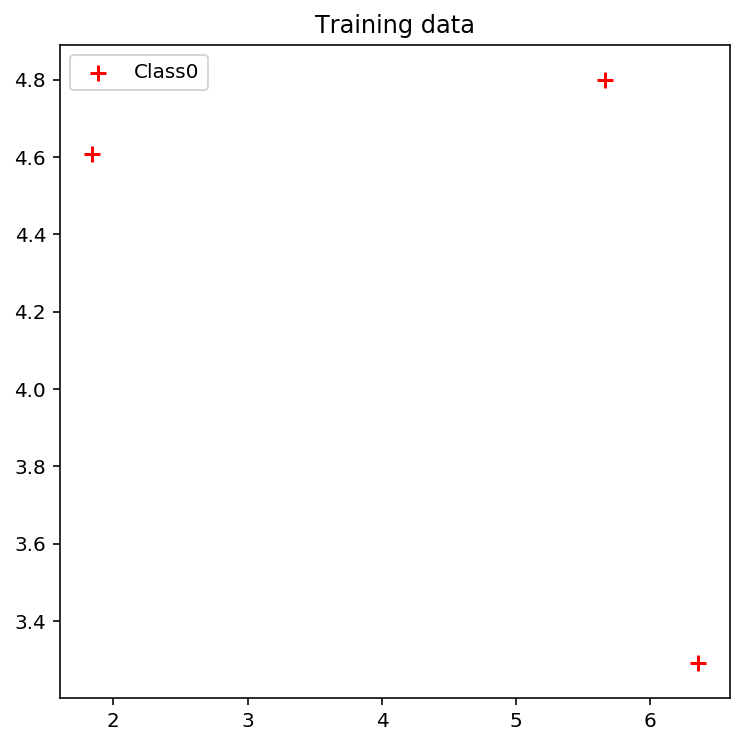

[[-2.          1.        ]
 [ 1.         -0.66666667]
 [-0.66666667  0.5       ]]
[-3.          1.66666667 -1.16666667]
[       nan 1.29099445        nan]


In [67]:
#YOUR CODE HERE
list_k = [1,2,3]
print(list_k)
a = np.zeros((300,3))
print(a.shape)

x12 = x1
x22 = x2

temp = np.zeros((3,2))
temp[0, :] = data[0, :]
temp[1, :] = data[1, :]
temp[2, :] = data[2,:]

print(temp)

xtemp = temp[: ,0]
ytemp = temp[: ,1]

plt.figure(1,figsize=(6,6))
plt.scatter(xtemp, ytemp, s=60, c='r', marker='+', label='Class0') 
plt.title('Training data')
plt.legend()
plt.show()


abc = np.zeros((3,2))

for k in range (0,3):
    abc[k,0] = ((-1)**(k+1))*(2/(k+1))
    abc[k,1] = ((-1)**(k+2))*(2/(k+2))
    
print(abc)

k = (abc[:,0]-abc[:,1])

print(k)
k = np.sqrt(k)
print(k)

3

<hr>

Let us fix the value $K=3$ for Questions Q5-Q9. 

The clusters are defined by the points $x_i$ such that:

$$
C_k = \{ x_i : a_i=k \}
$$

We denote $|C_k|$ the number of data points in cluster $C_k$.


### Q5: How many data points $|C_k|$ are in each cluster $C_k$, $k=0,1,2$?
<hr>

☐ $|C_0|,|C_1|,|C_2|$=27,175,98 <br>
☐ $|C_0|,|C_1|,|C_2|$=17,165,118 <br>
☐ $|C_0|,|C_1|,|C_2|$=47,155,98 <br>
☐ $|C_0|,|C_1|,|C_2|$=57,175,68 <br>

Hint: You may use function `np.count_nonzero`. You may print your result to double check your answer.

In [ ]:
#YOUR CODE HERE
3

<hr>

Let us now implement the mean update part of the k-means algorithm. 

Given the clusters $C_k$, $k=0,1,2$, the new value of the means $\mu_k$ is given by:

$$
\mu_k = \frac{\sum_{x_i\in C_k }x_i}{|C_k|} \in \mathbb{R}^2, \quad k=0,1,2
$$


### Q6: Provide the new value of the means $\mu_0,\mu_1,\mu_2$ with the cluster assignment vector $a$ computed in Question Q4.
<hr>

☐ $\mu_0,\mu_1,\mu_2$=[1.8,-1.2],[-0.6,-0.5],[1.7,0.5] <br>
☐ $\mu_0,\mu_1,\mu_2$=[-1.4,1.2],[0.6,-0.5],[-0.7,0.5] <br>
☐ $\mu_0,\mu_1,\mu_2$=[-0.4,-1.6],[0.9,0.7],[-0.1,-0.4] <br>
☐ $\mu_0,\mu_1,\mu_2$=[-0.3,-1.2],[-0.1,0.8],[0.3,0.1] <br>

Hint: You may visualize your result to double check your answer.

In [ ]:
#YOUR CODE HERE


<hr>

We have implemented the main two steps of the k-means algorithm, that are cluster assignment (Q4) and mean update (Q6).

The full k-means algorithm is as follows:

**Algorithm 1:**
   1. Initialize the means $\mu_k, \ k=0,1,2$.
   2. Repeat $N$ iterations:<br>
       2a. Cluster assignment : new $a$ (Q4)  <br>
       2b. Mean update : new $\mu_k$ (Q6)<br>
    
    

### Q7: Run the k-means algorithm N=25 iterations. What are the value of the means $\mu_k$ after N=25 iterations?
<hr>

Initial means are:
$$
\mu_k = \big[(-1)^{k+1}\frac{2}{k+1},(-1)^{k+2}\frac{2}{k+2}\big]\in \mathbb{R}^2, \quad \textrm{for } k=0,1,2
$$

☐ $\mu_0,\mu_1,\mu_2$=[-0.2,1.3],[-0.1,-0.9],[0.1,-1.2] <br>
☐ $\mu_0,\mu_1,\mu_2$=[-0.4,0.1],[-0.2,0.6],[-0.4,1.1] <br>
☐ $\mu_0,\mu_1,\mu_2$=[-1.2,1.1],[0.4,-0.6],[-0.4,1.2] <br>
☐ $\mu_0,\mu_1,\mu_2$=[1.4,1.0],[0.8,0.3],[0.4,1.5] <br>

Hint: You may visualize your result to double check your answer.

In [ ]:
#YOUR CODE HERE


<hr>

It is possible to evaluate the fitness of the k-means model with the data points using the k-means loss $L$ defined as:

$$
L(C_0,...,C_{K-1},\mu_0,...,\mu_{K-1})=\frac{1}{n} \sum_{i=0}^{n-1} \| x_i-\mu_{a_i}\|_2^2 =\frac{1}{n} \sum_{k=0}^{K-1} \sum_{x_i\in C_k} \| x_i-\mu_k\|_2^2
$$

### Q8: What is the value of the k-means loss $L$ after running the k-means algorithm N=25 iterations in Question Q7?
<hr>

☐ $L$=0.93 <br>
☐ $L$=0.56 <br>
☐ $L$=0.46 <br>
☐ $L$=0.83 <br>


In [ ]:
#YOUR CODE HERE


### Q9: Run the full k-means algorithm (Algorithm 1 with N=25) 5 times. At each time, a different initial random value for the means $\mu_k$ is generated from a uniform distribution between [-1,1]. We will call T the number of different initial random values for the means $\mu_k$ (here T=5). What is the minimum value of the k-means loss $L$?
<hr>
 
☐ $L$=0.06 <br>
☐ $L$=0.34 <br>
☐ $L$=0.25 <br>
☐ $L$=0.17 <br>

Hint: You may use function `np.random.uniform`. You may visualize your result to double check your answer.

In [ ]:
#YOUR CODE HERE


<hr>

The choice of the number $K$ of clusters is challenging and it depends on the data and the task at hand. 

One approach to tackle this issue is to **regularize** the k-means loss function by adding a term controlling the number of clusters:

\begin{eqnarray}
L_{Reg}(C_0,...,C_{K-1},\mu_0,...,\mu_{K-1}) &=& \frac{1}{n} \sum_{i=0}^{n-1} \| x_i-\mu_{a_i}\|_2^2 + \gamma K \\
&=&\frac{1}{n} \sum_{k=0}^{K-1} \sum_{x_i\in C_k} \| x_i-\mu_k\|_2^2 + \gamma K
\end{eqnarray}


where $\gamma$ controls the trade-off between the number of clusters $K$ and the fitness between the data points $x_i$ and the k-means model.


In [ ]:
# New data set
data = np.loadtxt('data/lab03_data02.txt', delimiter=',')

print('The number of data points is ',data.shape[0])
print('The number of data features is ',data.shape[1])

### Q10: Given the new data set, find the number of clusters K in [2,3,...,10] that minimizes the regularized k-means loss $L_{Reg}$ with $\gamma=0.1$, $N=25$ and $T=5$.
<hr>

☐ K=3 <br>
☐ K=5 <br>
☐ K=7 <br>
☐ K=9 <br>

Hint: You may apply z-scoring. You may visualize your result to double check your answer.

In [ ]:
#YOUR CODE HERE
